# 1 importation 

In [1]:
import pandas as pd
import numpy as np

# 2 . chargement des donnees

In [2]:
data = pd.read_csv('data/USA_Housing.csv')
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
data = data[['Avg. Area Income', 'Price']]

In [4]:
data.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


# 3 Analyse des donnes

In [5]:
data.isnull().sum()

Avg. Area Income    0
Price               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg. Area Income  5000 non-null   float64
 1   Price             5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [7]:
data['Avg. Area Income'].max()

np.float64(107701.74837763936)

In [8]:
data['Avg. Area Income'].min()

np.float64(17796.631189543397)

In [9]:
print('Min Avg .Area Inconne :',data['Avg. Area Income'].min())

Min Avg .Area Inconne : 17796.631189543397


In [10]:
print('Max Avg .Area Inconne :',data['Avg. Area Income'].max())

Max Avg .Area Inconne : 107701.74837763936


# 4.Division des donnees

In [11]:
x = data.iloc[:,: -1].values

In [12]:
y = data.iloc[ : ,-1].values

In [13]:
x

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]], shape=(5000, 1))

In [14]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

# 4.1 separation des donnes : Train et TEst

In [15]:
#x_train ,  x_test,  y_train, y_test 
from sklearn.model_selection import train_test_split

In [16]:
x_train ,  x_test,  y_train, y_test = train_test_split(x ,y, test_size=0.25, random_state=40)

In [17]:
print('x-train Shape', x_train.shape)
print('x-test Shape', x_test.shape)
print('y-train Shape', y_train.shape)
print('y-test Shape', y_test.shape)

x-train Shape (3750, 1)
x-test Shape (1250, 1)
y-train Shape (3750,)
y-test Shape (1250,)


# 5.Construire des modeles

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
modele_lineaire = LinearRegression()

In [20]:
# Entrenement du modele
modele_lineaire.fit(x_train, y_train)

LinearRegression()

In [21]:
# faire de prediction
y_predits = modele_lineaire.predict(x_test)

In [22]:
y_predits

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

In [23]:
y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ],
      shape=(1250,))

In [24]:
resultats = pd.DataFrame(y_test, y_predits)

In [25]:
resultats

,0
1.375828e+06,1.435770e+06
1.594792e+06,1.668448e+06
1.378886e+06,1.762215e+06
1.121330e+06,1.106261e+06
1.001248e+06,1.051124e+06
...,...
9.409852e+05,7.054441e+05
1.629427e+06,1.358647e+06
1.092890e+06,9.750058e+05
1.437100e+06,1.393996e+06


In [26]:
# Evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
print("MSE de la regrasssion lineaire:", mean_squared_error(y_test, y_predits))

MSE de la regrasssion lineaire: 70345556190.3212


In [28]:
print("R2 Score de la regression lineaire :", r2_score(y_test, y_predits))

R2 Score de la regression lineaire : 0.43322233931263276


# 6.Visualisation de Resultats

In [29]:
import matplotlib.pyplot as plt

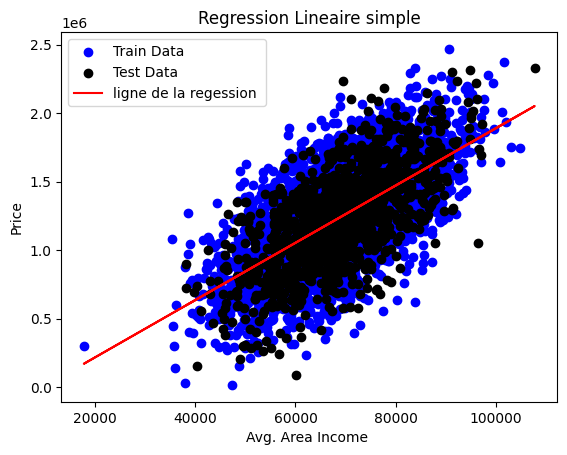

In [30]:
plt.scatter(x_train, y_train, color = 'blue', label = 'Train Data') 
plt.scatter(x_test, y_test, color = 'black', label = 'Test Data')
plt.plot(x_test, y_predits, color ='red')
plt.plot(x_train, modele_lineaire.predict(x_train), color = 'red', label = 'ligne de la regession ')
plt.xlabel("Avg. Area Income ")
plt.ylabel("Price")
plt.title("Regression Lineaire simple")
plt.legend()
plt.show()

# 7.Prediction Simple

In [31]:
data.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


In [32]:
resultats = pd.DataFrame({'y-reel': y_test, 'y-predits':y_predits})
resultats

,y-reel,y-predits
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


In [33]:
y_predits

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

In [34]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

In [38]:
print(modele_lineaire.predict([[79248.642455]]))

[1456563.84705715]


In [36]:
difference = y_test - y_predits

In [37]:
resultat =pd.DataFrame({'y-reel': y_test, 'y-predits' :y_predits, 'difference' : difference})
resultat

,y-reel,y-predits,difference
0,1.435770e+06,1.375828e+06,59942.165818
1,1.668448e+06,1.594792e+06,73655.637228
2,1.762215e+06,1.378886e+06,383328.555685
3,1.106261e+06,1.121330e+06,-15068.763964
4,1.051124e+06,1.001248e+06,49875.895328
...,...,...,...
1245,7.054441e+05,9.409852e+05,-235541.106927
1246,1.358647e+06,1.629427e+06,-270780.446581
1247,9.750058e+05,1.092890e+06,-117884.027067
1248,1.393996e+06,1.437100e+06,-43104.161504
